# 統計指標實作範例
## 常見於迴歸問題的評估指標
* 平均絕對誤差 - Mean Absolute Error (MAE)
* 平均平方誤差(均方差) - Mean Squared Error (MSE)

## 常見於分類問題的指標
* Binary Cross Entropy (CE)

##### 後面的課程還會有更詳細的說明

# [教學目標]
- 開始的第一堂課 : 我們先一些機器學習的基礎開始, 需要用到一些 Python 語法  
- 如果不熟 Python, 但是至少熟悉過一門語言, 可以從這些範例開始熟悉
- 所謂評價函數 (Metric), 就是機器學習的計分方式, 範例會展示平均絕對誤差 (MAE) 的寫法
- 我們來了解意義並寫作一個函數吧!!

# [範例重點]
- 複習 / 熟悉 Python 載入套件的語法, 了解什麼是代稱 (In[1], Out[1])
- 了解 Python 如何使用 Numpy 套件, 計算我們所需要的數值與繪圖 (In[2], Out[2], In[3], Out[3])
- 如何寫作平均絕對誤差 (MAE) 函數 (In[4], Out[4])

In [1]:
# import 是 Python 載入套件的基本語法 (類似 C 語言的 include), 後面接要載入的套件
# import AAAAA as BB, 其中 BB 是代稱, 表示除了載入 AAAAA 之外, 之後都可以用 BB 代替 AAAAA 這個名稱
# 常用套件往往有其對應代稱, numpy的代稱是np, pandas的代稱是pd, matplotlib.pyplot的代稱是plt
# numpy 常用於數值/陣列運算, pandas 擅長資料格式的調整, matplotlib 擅長繪圖
import numpy as np
import matplotlib.pyplot as plt

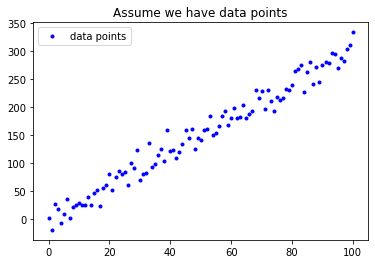

In [12]:
# Python 的變數不須宣告, 可能是文字, 數值, 陣列, 甚至是物件, 對初學者來說這往往是最難接受的地方
# 主要是 Python 在大多數情況下, 可以由運算"猜"出你想要的型態, 我們由下列語法看看發生了什麼事吧
# w, b 是數值
w = 3
b = 0.5

# np.linspace 是 numpy.linspace 的意思
# np.linspace(0, 100, 101)是指 0~100 劃分成 101 個刻度(含頭尾), 所也就是 0, 1, 2,...,100 這 101 個數
# 這時候, x_lin 因為要記錄不只一個數, 因為 np.linspace() 傳回的是一個 Array, 所以 x_lin 就變成 Array 了
x_lin = np.linspace(0, 100, 101)

# np.random.randn() 就是 numpy.random.randn(), 會隨機傳回標準常態分布的取樣值
# np.random.randn(101) 表示取樣了101次, 型態是 Array, 所以其他 + 與 * 的部分都是 Array 的加與乘, 一行就計算了101筆資料
# 所以最後的結果 y, 也是一個長度 101 的 Array
y = (x_lin + np.random.randn(101) * 5) * w + b

# 這邊就是將 x_lin 以及剛剛算完的 y, 當作座標值, 將101個點在平面上畫出來
# b. : b 就是 blue, 點(.) 就是最小單位的形狀, 詳細可以查 matplotlib 的官方說明
# Label 如果沒有打就不會顯示出來且plt.legend()也要有，這樣才會有圖例出來。
# 其中lengend()裡面的參數Loc為調整圖例的位置參數。
plt.plot(x_lin, y, 'b.', label = 'data points')
plt.title("Assume we have data points")
plt.legend(loc = 2)
plt.show()

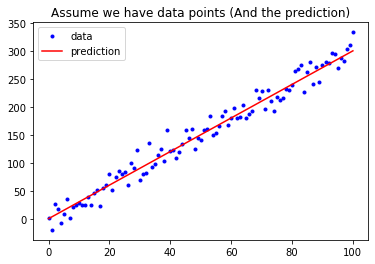

In [23]:
# 這邊的 y_hat, 就沒有隨機的部分了, 也就是下圖中的紅色實線部分
y_hat = x_lin * w + b
plt.plot(x_lin, y, 'b.', label = 'data')
# 上面的 'b.' 是藍色點狀, 下面的 'r-' 是紅色線狀, label 是圖示上的名稱
plt.plot(x_lin, y_hat, 'r-', label = 'prediction')
plt.title("Assume we have data points (And the prediction)")
plt.legend(loc = 2)
plt.show()

In [4]:
# Python 的函數是另一個新手上手的困難點, 由def開頭, 依序是函數名稱 / 輸入值, 冒號(:)結尾
# 最難讓人習慣的是 Python 的函式與條件判斷, 前後都沒有大括弧(其他程式常見), 而是以四格空白縮排來取代
# 以本例來說, mean_absolute_error 這個函數的定義範圍到 return mae 為止, 因為中間都是縮排, 而 """ 是多行註解(井號是單行註解)
# 函數中, sum(), abs(), len() 都是 Python 原有的方法, 因此可以直接呼叫
def mean_absolute_error(y, yp):
    """
    計算 MAE
    Args:
        - y: 實際值
        - yp: 預測值
    Return:
        - mae: MAE
    """
    # MAE : 將兩個陣列相減後, 取絕對值(abs), 再將整個陣列加總成一個數字(sum), 最後除以y的長度(len), 因此稱為"平均絕對誤差"
    mae = MAE = sum(abs(y - yp)) / len(y)
    return mae

# 呼叫上述函式, 傳回 y(藍點高度)與 y_hat(紅線高度) 的 MAE
MAE = mean_absolute_error(y, y_hat)
print("The Mean absolute error is %.3f" % (MAE))

The Mean absolute error is 11.529


## 練習時間
#### 請寫一個函式用來計算 Mean Square Error
$ MSE = \frac{1}{n}\sum_{i=1}^{n}{(Y_i - \hat{Y}_i)^2} $

### Hint: [如何取平方](https://googoodesign.gitbooks.io/-ezpython/unit-1.html)

In [40]:
'''

design MSE function
input:
    1. y : real data (type=ndarray, size=same)
    2. yp : predict data (type=ndarray, size=same)
output:
    1. MSE

'''
def MSE(y, yp):
    return sum((y - yp)**2) / len(y)